# Pre-election Polling

In [1]:
from loguru import logger
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
total_sample = 1447
bush = 727
dukakis = 583
others = 137

In [5]:
coords = {"candidates": ["Bush", "Dukakis", "Others"]}

with pm.Model(coords=coords) as m:
    alphas = pm.Uniform("alphas", lower=0, upper=1, dims="candidates")
    proportions = pm.Dirichlet("proportions", a=alphas, dims="candidates")
    diff_in_props = pm.Deterministic("diff", proportions[0] - proportions[1])

    votes = pm.Multinomial(
        "votes",
        n=total_sample,
        p=proportions,
        observed=[bush, dukakis, others],
    )

    trace = pm.sample(2000, tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas, proportions]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


In [ ]:
az.summary(trace, var_names=["proportions", "diff"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
proportions[Bush],0.503,0.013,0.478,0.528,0.0,0.0,10845.0,6442.0,1.0
proportions[Dukakis],0.403,0.013,0.378,0.427,0.0,0.0,10225.0,6303.0,1.0
proportions[Others],0.095,0.008,0.081,0.109,0.0,0.0,9947.0,6715.0,1.0
diff,0.100,0.025,0.051,0.147,0.0,0.0,10573.0,6547.0,1.0


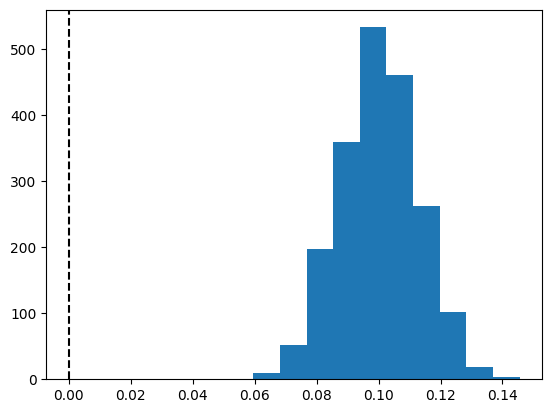

In [ ]:
plt.hist(trace.posterior["diff"].mean("chain"))
plt.axvline(0, linestyle="--", color="black")
plt.show()